In [1]:
import axc.pricer
pricer = axc.pricer.Pricer()
returns = pricer.get_returns()
returns

/mnt/data/shared/axc-backtesting/notebooks/axc/pricer.py:59: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(index, start="2000-01-01")
[*********************100%***********************]  1 of 1 completed
/mnt/data/shared/axc-backtesting/notebooks/axc/pricer.py:59: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(index, start="2000-01-01")
[*********************100%***********************]  1 of 1 completed
/mnt/data/shared/axc-backtesting/notebooks/axc/pricer.py:59: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(index, start="2000-01-01")
[*********************100%***********************]  1 of 1 completed
/mnt/data/shared/axc-backtesting/notebooks/axc/pricer.py:59: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(index, start="2000-01-01")
[*********************100%***********************]  1

,^GSPC,^RUT,GC=F,^990100-USD-STRD,^IXIC,^DJI,^N225
Date,,,,,,,
2000-10-05,-4.697822,-6.743721,-1.885418,-6.743424,-16.197222,-4.757206,-2.145660
2000-10-06,-5.579495,-8.446453,-1.787026,-5.404629,-16.254044,-6.313521,-2.473367
2000-10-10,-7.051766,-10.197271,-0.656462,-7.520108,-19.255783,-6.951324,-3.488744
2000-10-11,-8.371275,-11.034070,-0.952034,-7.808226,-18.680562,-6.982277,-3.827003
2000-10-12,-10.270647,-13.045845,1.282521,-7.270830,-20.128018,-10.670576,-3.052268
...,...,...,...,...,...,...,...
2025-12-08,0.738929,2.280120,5.198104,1.108633,0.196170,0.905329,0.736218
2025-12-09,0.650645,2.493527,5.688017,0.998462,0.326341,0.526916,0.881920
2025-12-10,0.794007,4.233511,2.057496,0.909971,0.539718,1.454805,-0.606856


In [2]:
underlying = pricer.load_market_data('underlying.csv')
underlying

,Return
Date,
2019-01-31,1.00
2019-02-28,2.00
2019-03-31,1.41
2019-04-30,1.42
2019-05-31,1.79
...,...
2025-02-28,-0.41
2025-03-31,-0.12
2025-04-30,1.86


In [3]:
factors = pricer.get_factors(returns, 2)
factors[0]

,Factor1,Factor2
Date,,
2000-10-05,1.920553,3.574421
2000-10-06,2.014059,3.207992
2000-10-10,2.407834,3.634186
2000-10-11,2.490846,2.934779
2000-10-12,2.812707,2.516720
...,...,...
2025-12-08,0.023811,0.332981
2025-12-09,0.026323,0.221225
2025-12-10,-0.014705,0.268865


In [ ]:
factors[1]


In [ ]:
%matplotlib widget
axc.pricer.plot_scatter_3d(factors[0], ['Factor1', 'Factor2', 'Factor3'])

In [ ]:
axc.pricer.plot_factors(factors[0])

In [ ]:
import pandas as pd
pd.concat([factors[0], underlying])

In [9]:
collate = pricer.collate_returns(returns, underlying)
collate

,^GSPC,^RUT,GC=F,^990100-USD-STRD,^IXIC,^DJI,^N225,Return
Date,,,,,,,,
2019-01-31,7.868440,11.186746,3.238669,7.675565,9.742776,7.168414,3.790804,1.00
2019-02-28,5.319511,6.922785,0.798528,4.856229,6.306376,5.657888,3.565113,2.00
2019-03-31,1.792426,-2.272861,-1.508230,1.049952,2.612536,0.048926,-0.838664,1.41
2019-04-30,4.308024,4.039471,-2.236934,3.386281,5.914044,3.451590,3.874952,1.42
2019-05-31,-6.577773,-7.900904,1.792953,-6.077014,-7.933407,-6.685508,-7.201849,1.79
...,...,...,...,...,...,...,...,...
2025-02-28,-1.865619,-5.495750,2.529999,-0.808070,-4.491380,-2.250688,-4.770683,-0.41
2025-03-31,-5.754470,-6.988217,10.081782,-4.643522,-8.213335,-4.195051,-4.139203,-0.12
2025-04-30,-0.212865,-2.923486,7.079216,0.572263,0.712057,-2.199262,-2.895851,1.86


In [10]:
regression = pricer.get_regression(collate)
regression[0]

ic| f"Coefficients: {model.coef_}": '''Coefficients: [-0.05660774  0.03957682  0.00780405 -0.08940041  0.00417363  0.04537364
                                      -0.02661745]'''
ic| f"Intercept: {model.intercept_}": 'Intercept: 1.1563445159263972'


,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.01
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [11]:
regression[1]

,^GSPC,^RUT,GC=F,^990100-USD-STRD,^IXIC,^DJI,^N225,Return,predicted
Date,,,,,,,,,
2019-01-31,7.868440,11.186746,3.238669,7.675565,9.742776,7.168414,3.790804,1.00,0.757760
2019-02-28,5.319511,6.922785,0.798528,4.856229,6.306376,5.657888,3.565113,2.00,0.889429
2019-03-31,1.792426,-2.272861,-1.508230,1.049952,2.612536,0.048926,-0.838664,1.41,0.894737
2019-04-30,4.308024,4.039471,-2.236934,3.386281,5.914044,3.451590,3.874952,1.42,0.830307
2019-05-31,-6.577773,-7.900904,1.792953,-6.077014,-7.933407,-6.685508,-7.201849,1.79,1.628522
...,...,...,...,...,...,...,...,...,...
2025-02-28,-1.865619,-5.495750,2.529999,-0.808070,-4.491380,-2.250688,-4.770683,-0.41,1.142551
2025-03-31,-5.754470,-6.988217,10.081782,-4.643522,-8.213335,-4.195051,-4.139203,-0.12,1.584883
2025-04-30,-0.212865,-2.923486,7.079216,0.572263,0.712057,-2.199262,-2.895851,1.86,1.037042


<Axes: xlabel='Date'>

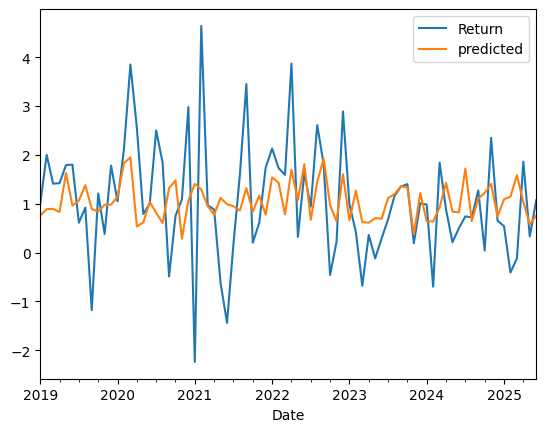

In [12]:
regression[1][['Return', 'predicted']].plot()

<Axes: xlabel='Return', ylabel='predicted'>

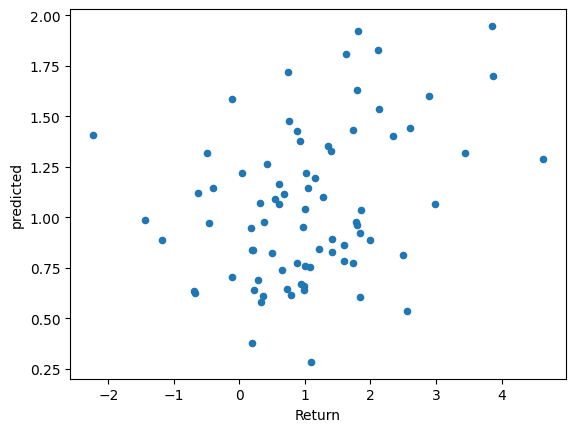

In [13]:
regression[1].plot.scatter(x='Return', y='predicted')

## References

http://www.thierry-roncalli.com/download/hedge-fund-replication-slides.pdf

https://thehedgefundjournal.com/hedge-fund-replication/

https://www.biz.uiowa.edu/faculty/atiwari/Replication.pdf